In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

C:\Users\Admin\AppData\Local\Temp\ipykernel_22256\401212243.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
data = pd.read_csv('1D_Dataset.csv')
data.head()

,1.00E+00,7.58E-01,1.12E-01,0.00E+00,8.06E-02,7.85E-02,6.61E-02,4.96E-02,4.75E-02,3.51E-02,...,0.00E+00.56,0.00E+00.57,0.00E+00.58,0.00E+00.59,0.00E+00.60,0.00E+00.61,0.00E+00.62,0.00E+00.63,0.00E+00.64,0.00E+00.65
0,0.908,0.784,0.531,0.363,0.366,0.34400,0.3330,0.30800,0.2970,0.3000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730,0.212,0.000,0.119,0.102,0.10200,0.1110,0.12400,0.1150,0.1330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000,0.910,0.681,0.473,0.229,0.06880,0.0000,0.00417,0.0146,0.0542,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570,0.399,0.238,0.148,0.000,0.00336,0.0403,0.08050,0.0705,0.0906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000,0.924,0.656,0.196,0.112,0.17600,0.1220,0.05090,0.0356,0.0560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21891 entries, 0 to 21890
Columns: 188 entries, 1.00E+00 to 0.00E+00.65
dtypes: float64(188)
memory usage: 31.4 MB


In [ ]:
for i in data.columns:
    if data[i].isna().sum() > 0:
        print(i)

In [ ]:
data.corr()

,1.00E+00,7.58E-01,1.12E-01,0.00E+00,8.06E-02,7.85E-02,6.61E-02,4.96E-02,4.75E-02,3.51E-02,...,0.00E+00.56,0.00E+00.57,0.00E+00.58,0.00E+00.59,0.00E+00.60,0.00E+00.61,0.00E+00.62,0.00E+00.63,0.00E+00.64,0.00E+00.65
1.00E+00,1.000000,0.767466,0.148402,-0.114112,-0.222490,-0.334051,-0.413920,-0.468337,-0.510378,-0.551921,...,-0.061321,-0.061046,-0.052499,-0.052716,-0.052140,-0.054863,-0.049468,-0.047783,-0.046771,-0.163734
7.58E-01,0.767466,1.000000,0.515984,0.000150,-0.121121,-0.137256,-0.208444,-0.265689,-0.304390,-0.326600,...,-0.029242,-0.030764,-0.024437,-0.024637,-0.023683,-0.027761,-0.020354,-0.019511,-0.019662,-0.173783
1.12E-01,0.148402,0.515984,1.000000,0.682999,0.419615,0.354880,0.284037,0.204398,0.133577,0.069880,...,-0.023979,-0.025841,-0.029358,-0.032568,-0.031749,-0.033592,-0.030765,-0.031587,-0.031897,0.264492
0.00E+00,-0.114112,0.000150,0.682999,1.000000,0.822557,0.594655,0.468016,0.376837,0.276286,0.181203,...,-0.027383,-0.028270,-0.038509,-0.043264,-0.042627,-0.040997,-0.040366,-0.041559,-0.040508,0.514016
8.06E-02,-0.222490,-0.121121,0.419615,0.822557,1.000000,0.880974,0.747665,0.656574,0.551029,0.433023,...,0.003276,0.000848,-0.011971,-0.017635,-0.018767,-0.018237,-0.021663,-0.025438,-0.024611,0.512777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.00E+00.61,-0.054863,-0.027761,-0.033592,-0.040997,-0.018237,0.004878,0.008532,0.019934,0.027673,0.024906,...,0.785644,0.813811,0.868236,0.914733,0.966527,1.000000,0.927660,0.874161,0.852649,0.036428
0.00E+00.62,-0.049468,-0.020354,-0.030765,-0.040366,-0.021663,-0.000697,0.002300,0.013515,0.021240,0.018037,...,0.732448,0.757357,0.801438,0.836081,0.882689,0.927660,1.000000,0.957046,0.931867,0.033586
0.00E+00.63,-0.047783,-0.019511,-0.031587,-0.041559,-0.025438,-0.005618,-0.002196,0.009695,0.018495,0.015779,...,0.706141,0.726383,0.766276,0.796163,0.834263,0.874161,0.957046,1.000000,0.982617,0.031863
0.00E+00.64,-0.046771,-0.019662,-0.031897,-0.040508,-0.024611,-0.006473,-0.003375,0.008570,0.017707,0.015158,...,0.699595,0.718626,0.759308,0.786580,0.820897,0.852649,0.931867,0.982617,1.000000,0.032100


In [ ]:
X=data.drop(data.columns[-1],axis=1)
y=data[data.columns[-1]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)

In [ ]:
#size for the sets
print('size of X_train:', X_train.shape)
print('size of X_test:', X_test.shape)
print('size of y_train:', y_train.shape)
print('size of y_test:', y_test.shape)

size of X_train: (15323, 187)
size of X_test: (6568, 187)
size of y_train: (15323,)
size of y_test: (6568,)


In [ ]:
#Reshape train and test data to (n_samples, 187, 1), where each sample is of size (187, 1)
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
def create_model(nepochs):
    cnn_model = tf.keras.models.Sequential()
    #First CNN layer  with 32 filters, conv window 3, relu activation and same padding
    cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.003), input_shape = (X_train.shape[1],1)))
    #Second CNN layer  with 64 filters, conv window 3, relu activation and same padding
    cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.003)))
    #Third CNN layer with 128 filters, conv window 3, relu activation and same padding
    cnn_model.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.003)))
    #Fourth CNN layer with Max pooling
    cnn_model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
    cnn_model.add(Dropout(0.5))
    #Flatten the output
    cnn_model.add(Flatten())
    #Add a dense layer with 256 neurons
    cnn_model.add(Dense(units = 256, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
    #Add a dense layer with 512 neurons
    cnn_model.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
    #Softmax as last layer with five outputs
    cnn_model.add(Dense(units = 5, activation='softmax'))
    cnn_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    cnn_model.fit(X_train, y_train, epochs=nepochs, batch_size = 10, validation_data = (X_test, y_test))
    return cnn_model

model = KerasClassifier(model=create_model, nepochs=10)

In [ ]:
param_grid = dict(nepochs=[10,20,30])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

In [ ]:
grid_result.best_params_

Epoch 1/10
 926/1533 [=================>............] - ETA: 35s - loss: 0.3319 - accuracy: 0.9105

In [ ]:
model = create_model(nepochs=30)

Text(0, 0.5, 'Accuracy')

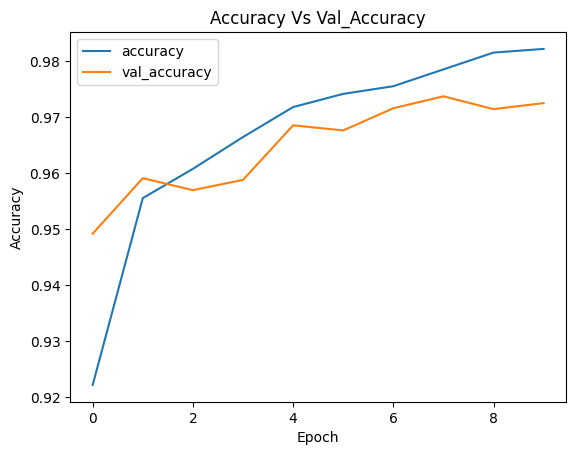

In [ ]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.title('Accuracy Vs Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

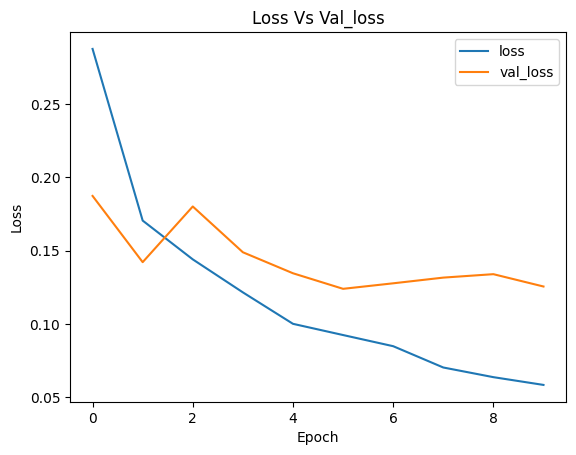

In [ ]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.title('Loss Vs Val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# Define K-Fold parameters
num_folds = 3
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [ ]:
# Define the CNN model
def create_cnn_model():
    cnn_model = tf.keras.models.Sequential()
    #First CNN layer  with 32 filters, conv window 3, relu activation and same padding
    cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.003), input_shape = (X_train.shape[1],1)))
    #Second CNN layer  with 64 filters, conv window 3, relu activation and same padding
    cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.003)))
    #Third CNN layer with 128 filters, conv window 3, relu activation and same padding
    cnn_model.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.003)))
    #Fourth CNN layer with Max pooling
    cnn_model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
    cnn_model.add(Dropout(0.5))
    #Flatten the output
    cnn_model.add(Flatten())
    #Add a dense layer with 256 neurons
    cnn_model.add(Dense(units = 256, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
    #Add a dense layer with 512 neurons
    cnn_model.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
    #Softmax as last layer with five outputs
    cnn_model.add(Dense(units = 5, activation='softmax'))
    return model

In [ ]:
# Perform K-Fold cross-validation
fold_accuracy = []

for train_index, val_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create a new model for each fold
    model = create_model(nepochs=30,nalpha1=)
    cnn_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    cnn_model.fit(X_train, y_train, epochs=10, batch_size = 10, validation_data = (X_test, y_test))

    # Evaluate the model on the validation set
    _, accuracy = model.evaluate(x_val_fold, y_val_fold)
    fold_accuracy.append(accuracy)




In [ ]:
import matplotlib.pyplot as plt

# Define the data for the boxplot
data = [fold_accuracy]

# Plot the boxplot
plt.boxplot(data)

# Add labels and title
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Distribution')

# Show the plot
plt.show()


In [ ]:
# Print the average accuracy over all folds
print(f'Average Accuracy: {np.mean(fold_accuracy)}')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy}')